In [125]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read individual CSV files 
 
StatePopulation_file = "../csv_dir_correct/PopulationPerState.csv"
AgeRange_file = "../csv_dir_correct/Age_Percentage.csv"
visitors_file = "../csv_dir_correct/VisitationPerSeason.csv"
meanIncome_file = "../csv_dir_correct/MeanIncomeByAgeAndRace.csv"
medIncome_file = "/Users/bunni/Desktop/national_parks/parks/csv_dir_correct/MedianIncomeByAgeAndRace.csv"
States_tallied_Merged_visitors_file = "../csv_dir_correct/States_tallied_Merged_visitors.csv"


StatePop_df = pd.read_csv(StatePopulation_file, keep_default_na=False, na_values=[""])
AgeRange_df = pd.read_csv(AgeRange_file, keep_default_na=False, na_values=[""])
Visitors_df = pd.read_csv(visitors_file, keep_default_na=False, na_values=[""])
meanInc_df = pd.read_csv(meanIncome_file, keep_default_na=False, na_values=[""])
medInc_df = pd.read_csv(medIncome_file, keep_default_na=False, na_values=[""])
## This was orginally written out of panda from source csvs : PopulationPerState.csv,VisitationPerSeason.csv
States_tallied_Merged_visitors_df = pd.read_csv(States_tallied_Merged_visitors_file, keep_default_na=False, na_values=[""])



In [126]:
#print (Visitors_df.head(3))
Visitors_df.shape
# corrected the mistake in csv input file 
Visitors_df = Visitors_df.rename(columns={'Total':'Winter'})
Visitors_df.head()
Visitors_df.groupby(['State']).nunique()
bins = ['Alaska','Arizona','California','Colorado','Maine','Oregon','Tennessee','Texas','Utah','Virginia','Washington','Wisconsin','Wyoming']
bins


['Alaska',
 'Arizona',
 'California',
 'Colorado',
 'Maine',
 'Oregon',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Washington',
 'Wisconsin',
 'Wyoming']

In [127]:
#print (States_tallied_Merged_visitors_df.head(5))
States_tallied_Merged_visitors_df.columns
States_tallied_Merged_visitors_df

,Unnamed: 0,Park,State,Spring,Summer,Fall,Winter,State_p,Population
0,0,Acadia,Maine,54212,264288,157764,491360,Maine,1336000
1,1,Apostle Islands,Wisconsin,5779,24752,12170,45540,Wisconsin,5795000
2,2,Arches,Utah,172387,202429,151742,569658,Utah,3102000
3,3,Big Bend,Texas,56583,21896,35669,155748,Texas,27677000
4,4,Bryce Canyon,Utah,158701,245418,177327,623241,Utah,3102000
5,5,Capitol Reef,Utah,270641,259080,217466,786764,Utah,3102000
6,6,Crater Lake,Oregon,24468,201731,54512,285594,Oregon,4143000
7,7,Death Valley,California,99269,124506,107237,410848,California,39500000
8,8,Grand Canyon,Arizona,537160,657787,501213,1967482,Arizona,70160000
9,9,Grand Teton,Wyoming,484160,1642717,762411,3207493,Wyoming,572000


In [3]:
Visitors_df.shape


(25, 6)

In [25]:
experiment_parks_tot = Visitors_df.groupby(['Park','State']).sum()
experiment_parks_tot.head()
#len(experiment_parks_tot)
#experiment_parks_tot.groupby(['State']).sum()

,,Spring,Summer,Fall,Winter
Park,State,,,,
Acadia,Maine,54212,264288,157764,491360
Apostle Islands,Wisconsin,5779,24752,12170,45540
Arches,Utah,172387,202429,151742,569658
Big Bend,Texas,56583,21896,35669,155748
Bryce Canyon,Utah,158701,245418,177327,623241


In [187]:
#Ignore
# x_spring_park_df = experiment_parks_tot.loc[:,'Spring']
# x_spring_park_df.head()
# x_spring_park_df.groupby('State').sum()
# x_spring_park_df
#x_spring_park_df.groupby(['State','Park']).count()
############################################################
# calculate spring total visitors per state #################
parks_states_spring_df = experiment_parks_tot.groupby(['State','Park'])[['Spring']].sum()
parks_states_spring_df
#parks_states_spring_df.columns
x = parks_states_spring_df.reset_index()
total_spring_df = x.groupby(['State'])[['Spring']].sum()
#################################################################

total_spring_df.head()
total_spring_df = total_spring_df.reset_index()
total_spring_df.columns
total_spring_df.set_index(['State'],inplace=True)

In [188]:
total_spring_df.head()

,Spring
State,
Alaska,4806
Arizona,1425597
California,939261
Colorado,182488
Maine,54212


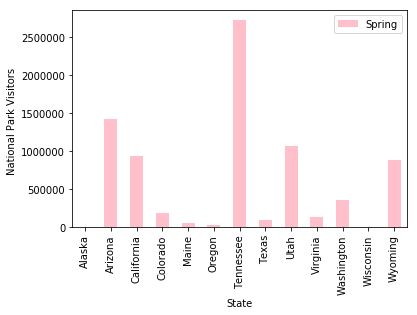

<Figure size 432x288 with 0 Axes>

In [191]:
### plotted park viitors against states 
total_spring_df.plot(kind="bar", facecolor="pink")
plt.ylabel("National Park Visitors ")
plt.xlabel('State')
plt.show()
plt.tight_layout()

In [129]:
# calculate Summer total visitors per state #################
parks_states_summer_df = experiment_parks_tot.groupby(['State','Park'])[['Summer']].sum()
x = parks_states_summer_df.reset_index()
total_summer_df = x.groupby(['State'])[['Summer']].sum()
total_summer_df.head()
total_summer__df = total_summer_df.reset_index()
total_summer_df.columns
total_summer_df.head()


,Summer
State,
Alaska,44912
Arizona,1402871
California,1474663
Colorado,763554
Maine,264288


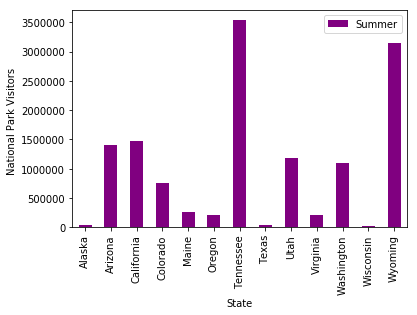

<Figure size 432x288 with 0 Axes>

In [190]:
### plotted park viitors against states 
total_summer_df.plot(kind="bar", facecolor="purple")
plt.ylabel("National Park Visitors ")
plt.xlabel('State')
plt.show()
plt.tight_layout()

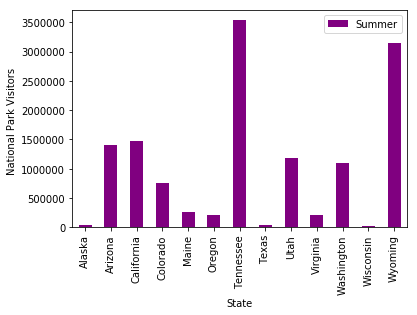

<Figure size 432x288 with 0 Axes>

In [186]:
### plotted park viitors against states 
total_summer_df.plot(kind="bar", facecolor="purple")
plt.ylabel("National Park Visitors ")
plt.xlabel('State')
plt.show()
plt.tight_layout()

In [182]:
# calculate Summer total visitors per state #################
parks_states_fall_df = experiment_parks_tot.groupby(['State','Park'])[['Fall']].sum()
x = parks_states_fall_df.reset_index()
total_fall_df = x.groupby(['State'])[['Fall']].sum()
total_fall_df.head()
total_fall_df.columns
total_fall_df = total_fall_df.reset_index()
total_fall_df.columns
total_fall_df.set_index(['State'],inplace=True)

In [183]:
# I have states as my index in fall 
total_fall_df.head()


,Fall
State,
Alaska,8076
Arizona,1280082
California,1028505
Colorado,404973
Maine,157764


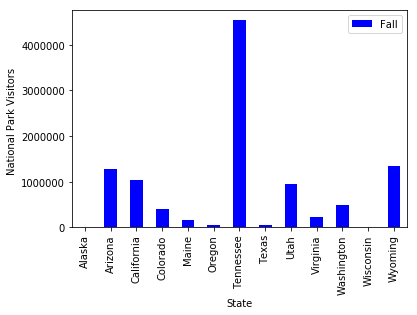

<Figure size 432x288 with 0 Axes>

In [184]:
### plotted park viitors against states 
total_fall_df.plot(kind="bar", facecolor="blue")
plt.ylabel("National Park Visitors ")
plt.xlabel('State')
plt.show()
plt.tight_layout()

In [159]:
# calculate winter total visitors per state #################
parks_states_winter_df = experiment_parks_tot.groupby(['State','Park'])[['Winter']].sum()
x = parks_states_winter_df.reset_index()
total_winter_df = x.groupby(['State'])[['Winter']].sum()
total_winter_df.head()
total_winter_df = total_winter_df.reset_index()
total_winter_df.columns
total_winter_df.head()

,State,Winter
0,Alaska,57794
1,Arizona,5284841
2,California,3991916
3,Colorado,1441294
4,Maine,491360


In [132]:
# Merge all dataframes with accumulated visitors total per state per seasons into one frame
all_total_reviews_state_2__df = pd.merge(total_winter_df,total_spring_df,on='State')
all_total_reviews_state_3_df = pd.merge(total_summer_df,total_fall_df,on='State')

In [133]:
# I am merging into final one dataframe
all_total_reviews_state_df = pd.merge(all_total_reviews_state_2__df,all_total_reviews_state_3_df,on='State') 
all_total_reviews_state_df.head()

all_total_reviews_state_df.set_index('State',inplace=True)


In [175]:

#total_winter_df.set_index(['State'],inplace=True)
total_winter_df.reset_index()
total_winter_df.columns
total_winter_df.head()

,Winter
State,
Alaska,57794
Arizona,5284841
California,3991916
Colorado,1441294
Maine,491360


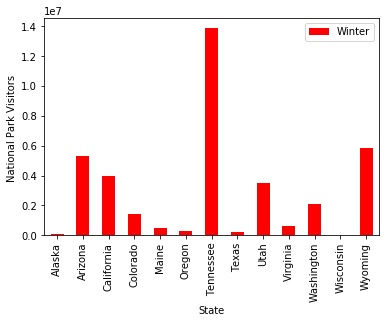

<Figure size 432x288 with 0 Axes>

In [173]:
### plotted park viitors against states 
total_winter_df.plot(kind="bar", facecolor="red")
plt.ylabel("National Park Visitors ")
plt.xlabel('State')
plt.show()
plt.tight_layout()

In [ ]:
States_tallied_Merged_visitors_df.describe()
States_tallied_Merged_visitors_summed_df = States_tallied_Merged_visitors_df.groupby('Park').sum()
States_tallied_Merged_visitors_summed_df.to_csv('../csv_dir_correct/States_tallied_Merged_visitors_summed.csv')

In [223]:
Top_3parks_winter_df = (States_tallied_Merged_visitors_summed_df.sort_values(by='Winter', ascending=False)).head(3)

In [231]:
Top_3parks_Spring_df = (States_tallied_Merged_visitors_summed_df.sort_values(by='Spring', ascending=False)).head(3)

In [233]:
Top_3parks_Summer_df = (States_tallied_Merged_visitors_summed_df.sort_values(by='Summer', ascending=False)).head(3)

In [237]:
Top_3parks_Fall_df = (States_tallied_Merged_visitors_summed_df.sort_values(by='Fall', ascending=False)).head(3)

In [238]:
# Writing out csv  most visted parks top 3 in the nation 
Top_3parks_winter_df.to_csv('Top_3parks_winter.csv')
Top_3parks_Spring_df.to_csv('Top_3parks_Spring.csv')
Top_3parks_Summer_df.to_csv('Top_3parks_Summer.csv')
Top_3parks_Fall_df.to_csv('Top_3parks_Fall.csv')

In [235]:

Bottom_3parks_winter_df = (States_tallied_Merged_visitors_summed_df.sort_values(by='Winter', ascending=True)).head(3)
Bottom_3parks_Spring_df = (States_tallied_Merged_visitors_summed_df.sort_values(by='Spring',ascending=True)).head(3)
Bottom_3parks_Summer_df = (States_tallied_Merged_visitors_summed_df.sort_values(by='Summer',ascending=True)).head(3)
Bottom_3parks_Fall_df = (States_tallied_Merged_visitors_summed_df.sort_values(by='Fall',ascending=True)).head(3)

In [216]:
# # I am merging StatePop and Visitordfs
# #pd.merge(Visitors_df,StatePop_df,
# new_concat_visitor_pop_df = pd.concat([Visitors_df,StatePop_df],axis=1)
# new_concat_visitor_pop_df

In [240]:
# Writing out csv with least 3 visited parks in nation 
Bottom_3parks_winter_df.to_csv('../csv_dir_correct/Bottom_3parks_winter.csv')
Bottom_3parks_Spring_df.to_csv('../csv_dir_correct/Bottom_3parks_Spring.csv')
Bottom_3parks_Summer_df.to_csv('../csv_dir_correct/Bottom_3parks_Summer.csv')
Bottom_3parks_Fall_df.to_csv('../csv_dir_correct/Bottom_3parks_Fall.csv')

In [183]:
# # this is for Jen to get the csv read in ####
# new_concat_visitor_pop_df.to_csv('example.csv')
# #Summer_Fall_Parks_collections_df

In [202]:
# I m going to use the visitor df to get some analysis 
Visitors_df.head(10)
Visitors_df.groupby(['State','Winter']).sum()
Visitors_df_Winter_winner_df = Visitors_df.groupby(['State','Winter']).sum() 
Visitors_df_Winter_winner_df
#Visitors_df.groupby(['State','Winter']).mean()
Visitors_df_Winter_winner_df.to_csv('../csv_dir_correct/visitors_winner_winter.csv')
Visitors_df_Spring_winner_df = Visitors_df.groupby(['State','Spring']).sum() 
Visitors_df_Spring_winner_df.to_csv('../csv_dir_correct/Visitors_df_Spring_winner_Spring.csv')
Visitors_df.groupby(['State','Summer']).sum()
Visitors_df_Summer_winner_df = Visitors_df.groupby(['State','Summer']).sum()
Visitors_df_Summer_winner_df.to_csv('../csv_dir_correct/Visitors_winner_Summer.csv')
Visitors_df_Fall_winner_df = Visitors_df.groupby(['State','Fall']).sum()
Visitors_df_Fall_winner_df.to_csv('../csv_dir_correct/Visitors_winner_Fall.csv')